In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#import pandas_profiling
#from pydantic_settings import BaseSettings

In [2]:
dados = pd.read_csv('fraud_dataset_example.csv')
dados.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
 10  isFlaggedFraud  101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [4]:
dados.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,101613.000000,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,101613.000000,101613.0
mean,8.523457,1.740901e+05,9.071753e+05,9.234992e+05,8.810428e+05,1.183998e+06,0.001142,0.0
std,1.820681,3.450199e+05,2.829575e+06,2.867319e+06,2.399949e+06,2.797761e+06,0.033768,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,1.001659e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.338541e+04,2.019047e+04,0.000000e+00,2.105800e+04,5.178343e+04,0.000000,0.0
75%,10.000000,2.124984e+05,1.947150e+05,2.192178e+05,5.919217e+05,1.063122e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07,1.000000,0.0


In [5]:
dados.select_dtypes(exclude=['object'])

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
101608,10,7477.02,785.00,0.00,0.00,0.00,0,0
101609,10,282252.35,220339.29,0.00,95156.01,91286.97,0,0
101610,10,17289.01,0.00,0.00,0.00,0.00,0,0
101611,10,1347146.45,1605.00,0.00,541639.43,2186953.43,0,0


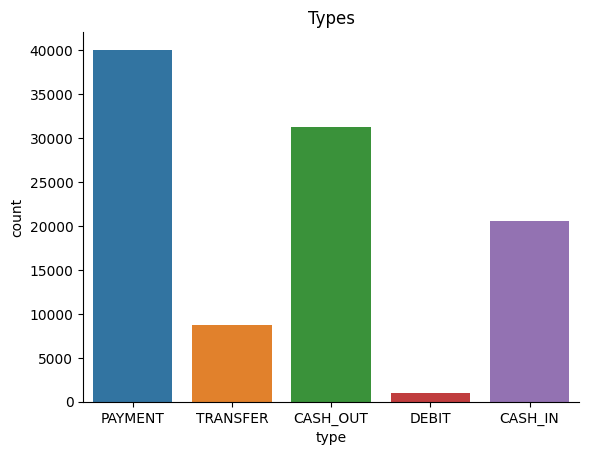

In [6]:
ax = sns.countplot(x='type', data=dados).set_title('Types')
ax = sns.despine(right=True, top=True)

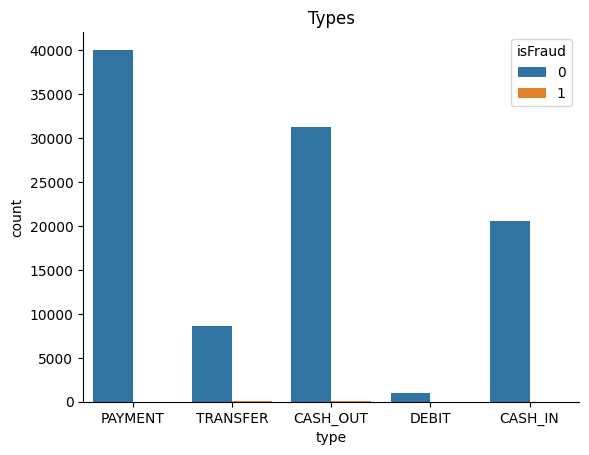

In [7]:
ax = sns.countplot(x=dados.type, hue='isFraud', data=dados).set_title('Types')
ax = sns.despine(right=True, top=True)

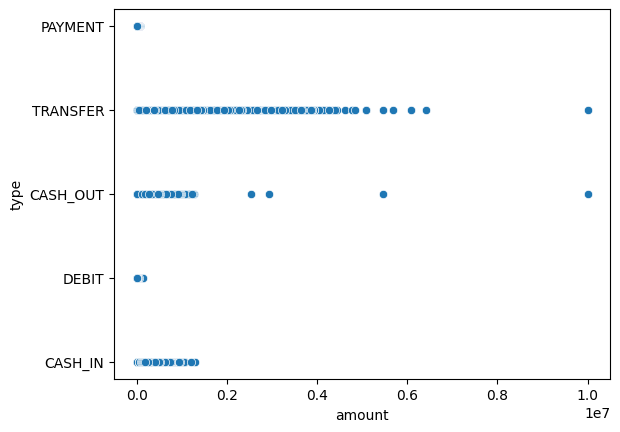

In [8]:
ax = sns.scatterplot(x='amount', y='type', data=dados)

In [9]:
dados.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
dados = dados[['isFraud', 'isFlaggedFraud', 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]
dados.head()

,isFraud,isFlaggedFraud,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


In [11]:
colunas = {
    'isFraud':'fraude',
    'isFlaggedFraud':'super_fraude',
    'step':'tempo',
    'type':'tipo',
    'amount':'valor',
    'nameOrig':'cliente1',
    'oldbalanceOrg':'saldo_inicial_c1',
    'newbalanceOrig':'novo_saldo_c1',
    'nameDest':'cliente2',
    'oldbalanceDest':'saldo_inicial_c2',
    'newbalanceDest':'novo_saldo_c2'
    
}

In [12]:
dados = dados.rename(columns = colunas)
dados.head()

,fraude,super_fraude,tempo,tipo,valor,cliente1,saldo_inicial_c1,novo_saldo_c1,cliente2,saldo_inicial_c2,novo_saldo_c2
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


In [13]:
dados.describe()

,fraude,super_fraude,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2
count,101613.000000,101613.0,101613.000000,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05
mean,0.001142,0.0,8.523457,1.740901e+05,9.071753e+05,9.234992e+05,8.810428e+05,1.183998e+06
std,0.033768,0.0,1.820681,3.450199e+05,2.829575e+06,2.867319e+06,2.399949e+06,2.797761e+06
min,0.000000,0.0,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.0,8.000000,1.001659e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,0.0,9.000000,5.338541e+04,2.019047e+04,0.000000e+00,2.105800e+04,5.178343e+04
75%,0.000000,0.0,10.000000,2.124984e+05,1.947150e+05,2.192178e+05,5.919217e+05,1.063122e+06
max,1.000000,0.0,10.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07


In [14]:
dados.isnull().sum()

fraude              0
super_fraude        0
tempo               0
tipo                0
valor               0
cliente1            0
saldo_inicial_c1    0
novo_saldo_c1       0
cliente2            0
saldo_inicial_c2    0
novo_saldo_c2       0
dtype: int64

In [15]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
fraude,101613.0,1.141586e-03,3.376824e-02,0.00,0.00,0.00,0.00,1.00
super_fraude,101613.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00
tempo,101613.0,8.523457e+00,1.820681e+00,1.00,8.00,9.00,10.00,10.00
valor,101613.0,1.740901e+05,3.450199e+05,0.32,10016.59,53385.41,212498.40,10000000.00
saldo_inicial_c1,101613.0,9.071753e+05,2.829575e+06,0.00,0.00,20190.47,194715.00,38939424.03
novo_saldo_c1,101613.0,9.234992e+05,2.867319e+06,0.00,0.00,0.00,219217.76,38946233.02
saldo_inicial_c2,101613.0,8.810428e+05,2.399949e+06,0.00,0.00,21058.00,591921.70,34008736.98
novo_saldo_c2,101613.0,1.183998e+06,2.797761e+06,0.00,0.00,51783.43,1063121.64,38946233.02


In [16]:
dados.shape

(101613, 11)

In [17]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fraude            101613 non-null  int64  
 1   super_fraude      101613 non-null  int64  
 2   tempo             101613 non-null  int64  
 3   tipo              101613 non-null  object 
 4   valor             101613 non-null  float64
 5   cliente1          101613 non-null  object 
 6   saldo_inicial_c1  101613 non-null  float64
 7   novo_saldo_c1     101613 non-null  float64
 8   cliente2          101613 non-null  object 
 9   saldo_inicial_c2  101613 non-null  float64
 10  novo_saldo_c2     101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [18]:
dados.groupby('fraude').tempo.count()

fraude
0    101497
1       116
Name: tempo, dtype: int64

In [19]:
#pandas_profiling.ProfileReport(dados)

In [20]:
dados = pd.get_dummies(data=dados, columns=['tipo'])
dados.head()

,fraude,super_fraude,tempo,valor,cliente1,saldo_inicial_c1,novo_saldo_c1,cliente2,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,1,0
1,0,0,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,1,0
2,1,0,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0,0,0,0,1
3,1,0,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0,1,0,0,0
4,0,0,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,1,0


In [21]:
dados.drop(columns=['cliente1', 'cliente2', 'super_fraude'], axis=1, inplace=True)

In [22]:
dados.head()

,fraude,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,0,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,0,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [23]:
X = dados.drop(['fraude'], axis=1)
y = dados['fraude']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = SEED)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression(max_iter = 1000, random_state = SEED)

In [28]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [29]:
from sklearn import metrics

In [30]:
print(f'Acurácia: ', metrics.accuracy_score(y_test, y_pred))
print(f'Precisão: ', metrics.precision_score(y_test, y_pred))
print(f'Recall: ', metrics.recall_score(y_test, y_pred))
print(f'F1: ', metrics.f1_score(y_test, y_pred))

Acurácia:  0.9989765391276965
Precisão:  0.2
Recall:  0.043478260869565216
F1:  0.07142857142857142


In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

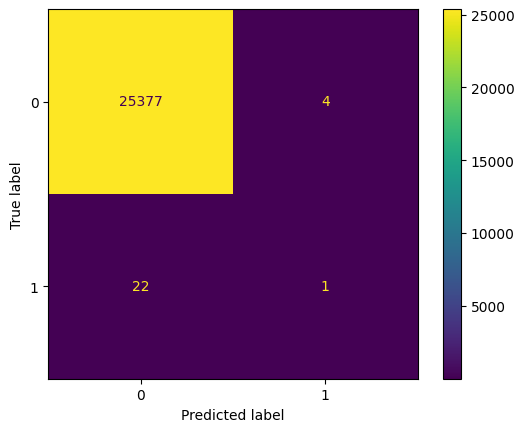

In [32]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

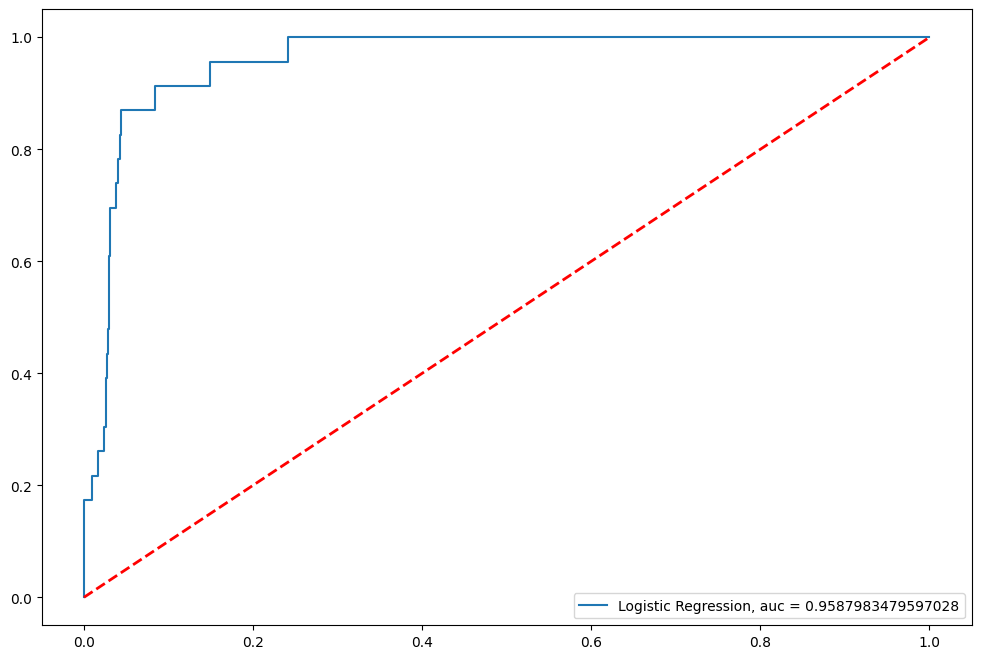

In [33]:
y_pred_prob = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label = 'Logistic Regression, auc = '+str(auc) )
plt.plot([0, 1], [0, 1], color = 'red', lw=2, linestyle = '--')
plt.legend(loc=4)


In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
smote = SMOTE(random_state=SEED)

In [36]:
X = dados.drop(['fraude'], axis=1)
y = dados['fraude']

In [37]:
x_resampled, y_resampled = smote.fit_resample(X, y)
dados_balanceados = pd.concat([x_resampled, y_resampled], axis=1)
dados_balanceados

,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER,fraude
0,1,9839.640000,170136.000000,160296.36,0.000000,0.000000,0,0,0,1,0,0
1,1,1864.280000,21249.000000,19384.72,0.000000,0.000000,0,0,0,1,0,0
2,1,181.000000,181.000000,0.00,0.000000,0.000000,0,0,0,0,1,1
3,1,181.000000,181.000000,0.00,21182.000000,0.000000,0,1,0,0,0,1
4,1,11668.140000,41554.000000,29885.86,0.000000,0.000000,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
202989,5,17608.962863,17608.962863,0.00,0.000000,0.000000,0,0,0,0,1,1
202990,7,12116.291013,12116.291013,0.00,0.000000,0.000000,0,0,0,0,1,1
202991,1,231612.880715,231612.880715,0.00,1945.589357,9370.603471,0,0,0,0,0,1
202992,9,547325.144758,547325.144758,0.00,0.000000,0.000000,0,0,0,0,1,1


In [38]:
dados_balanceados.groupby('fraude').tempo.count()

fraude
0    101497
1    101497
Name: tempo, dtype: int64

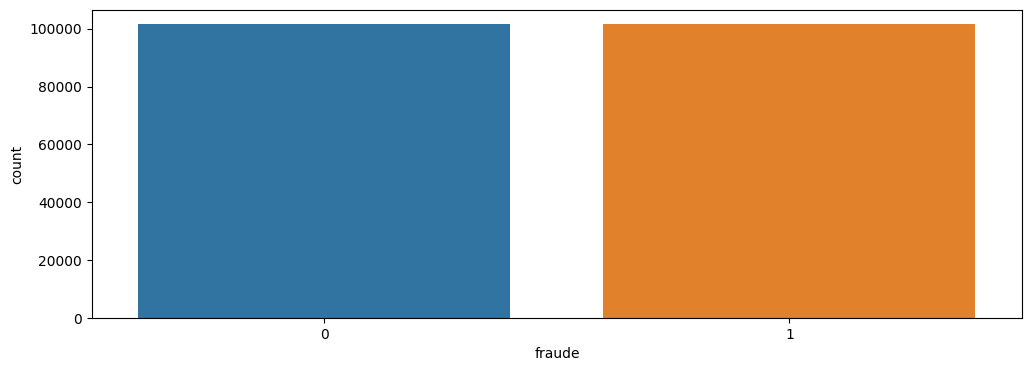

In [39]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x='fraude', data=dados_balanceados)


In [40]:
X = dados_balanceados.drop(['fraude'], axis=1)
y = dados_balanceados['fraude']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = SEED)

In [42]:
model = LogisticRegression(max_iter = 1000, random_state = SEED)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [43]:

print(f'Acurácia: ', metrics.accuracy_score(y_test, y_pred))
print(f'Precisão: ', metrics.precision_score(y_test, y_pred))
print(f'Recall: ', metrics.recall_score(y_test, y_pred))
print(f'F1: ', metrics.f1_score(y_test, y_pred))

Acurácia:  0.9417722516699837
Precisão:  0.9241993556945234
Recall:  0.9623125493291239
F1:  0.9428709521507975


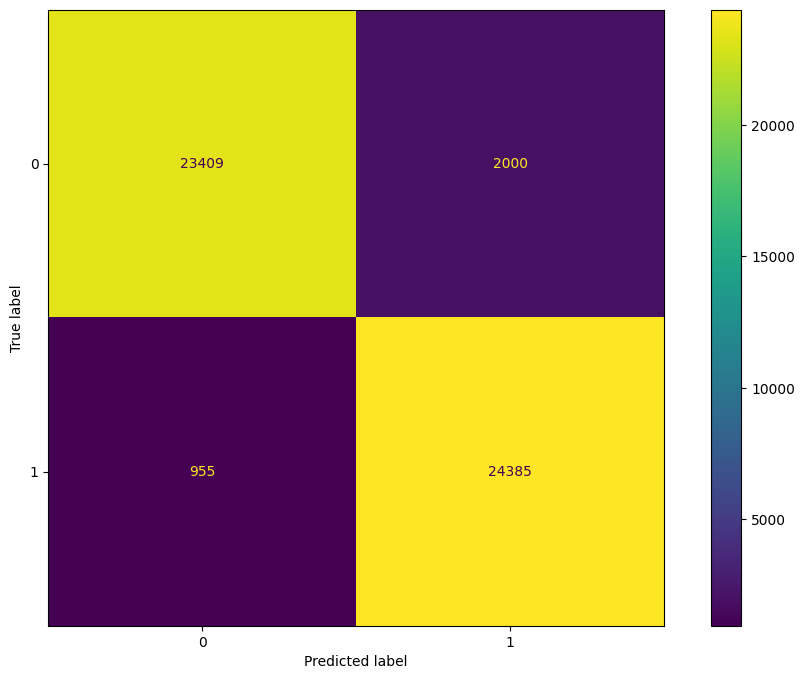

In [44]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

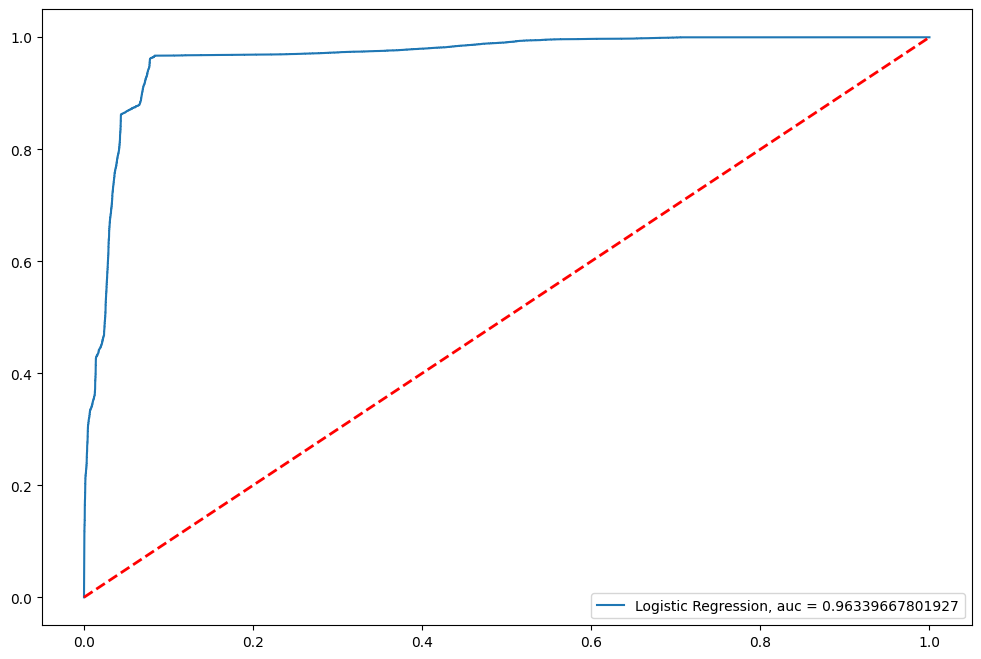

In [45]:
y_pred_prob = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label = 'Logistic Regression, auc = '+str(auc) )
plt.plot([0, 1], [0, 1], color = 'red', lw=2, linestyle = '--')
plt.legend(loc=4)

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt = DecisionTreeClassifier(max_depth=5, random_state=SEED)

In [48]:
def metricas(y_test, y_pred):
    print(f'Acurácia: ', metrics.accuracy_score(y_test, y_pred))
    print(f'Precisão: ', metrics.precision_score(y_test, y_pred))
    print(f'Recall: ', metrics.recall_score(y_test, y_pred))
    print(f'F1: ', metrics.f1_score(y_test, y_pred))
    
def conf_matrix(cm, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)
    disp.plot()
    
def curva_roc(X_test, y_test):
    y_pred_prob = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
    auc = metrics.roc_auc_score(y_test, y_pred_prob)

    plt.rcParams['figure.figsize'] = (12., 8.)
    plt.plot(fpr, tpr, label = 'Logistic Regression, auc = '+str(auc) )
    plt.plot([0, 1], [0, 1], color = 'red', lw=2, linestyle = '--')
    plt.legend(loc=4)

In [49]:
dt.fit(X_train, y_train)
y_pred_tree = dt.predict(X_test)

metricas(y_test, y_pred_tree)

Acurácia:  0.9622849711324362
Precisão:  0.9381639982043992
Recall:  0.9897000789265983
F1:  0.9632432017206943


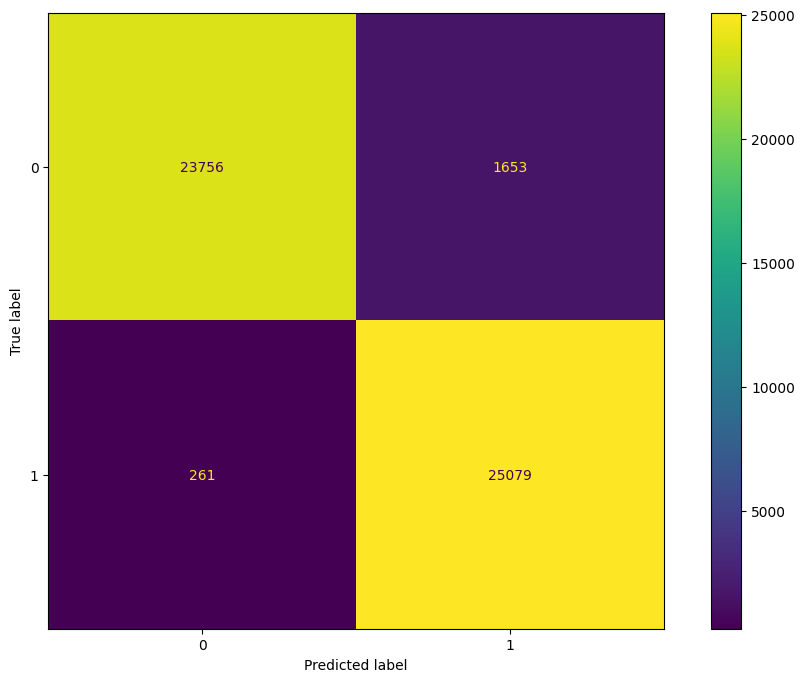

In [52]:
cm = confusion_matrix(y_test, y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
    

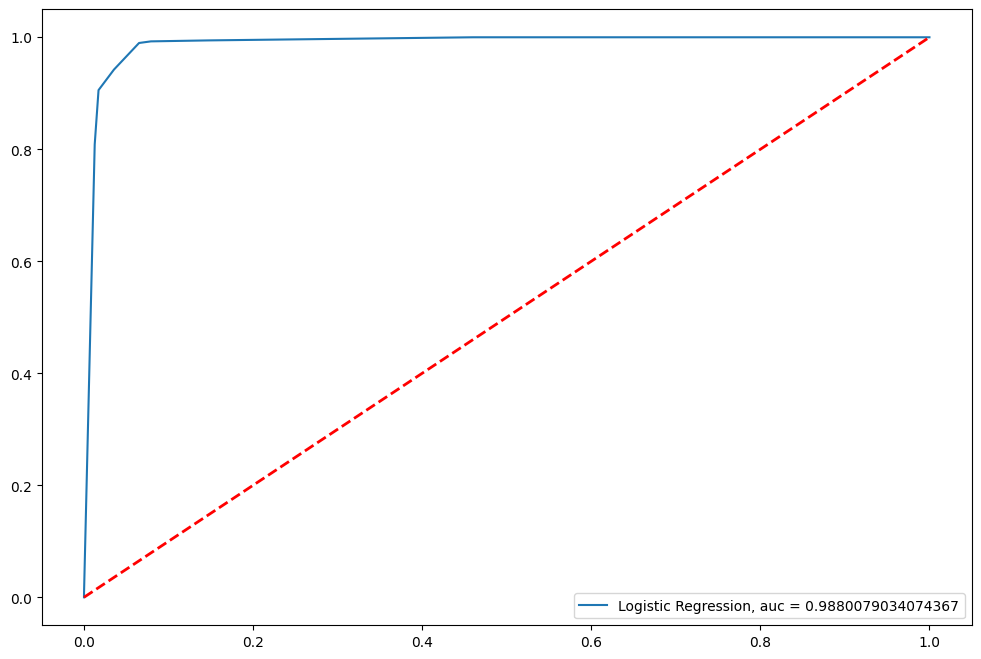

In [53]:
y_pred_prob = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label = 'Logistic Regression, auc = '+str(auc) )
plt.plot([0, 1], [0, 1], color = 'red', lw=2, linestyle = '--')
plt.legend(loc=4)

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf = RandomForestClassifier(max_depth = 5, random_state = SEED)

In [57]:
model = rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

metricas(y_test, y_pred_rf)

Acurácia:  0.9723738398786183
Precisão:  0.9705165500432424
Recall:  0.9742699289660616
F1:  0.9723896175509079


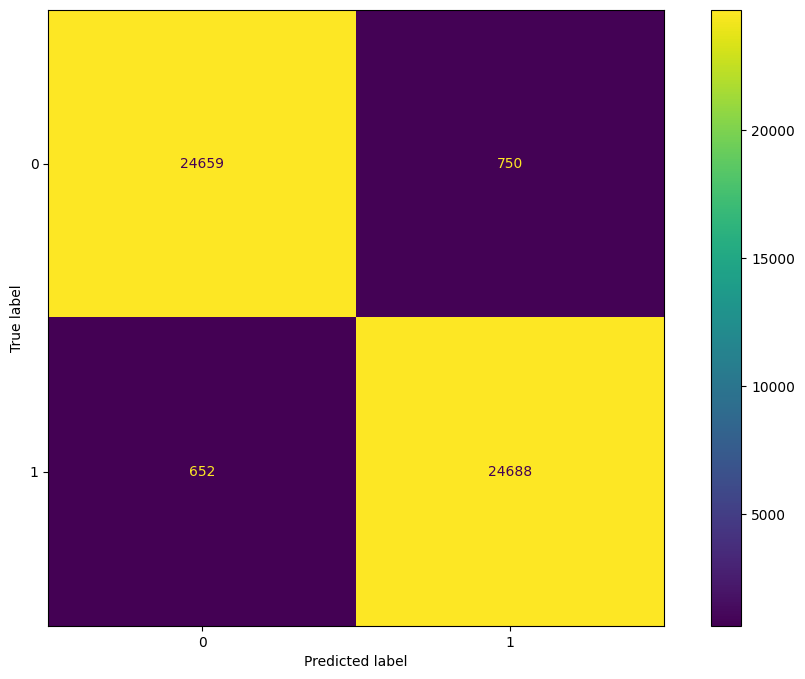

In [58]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

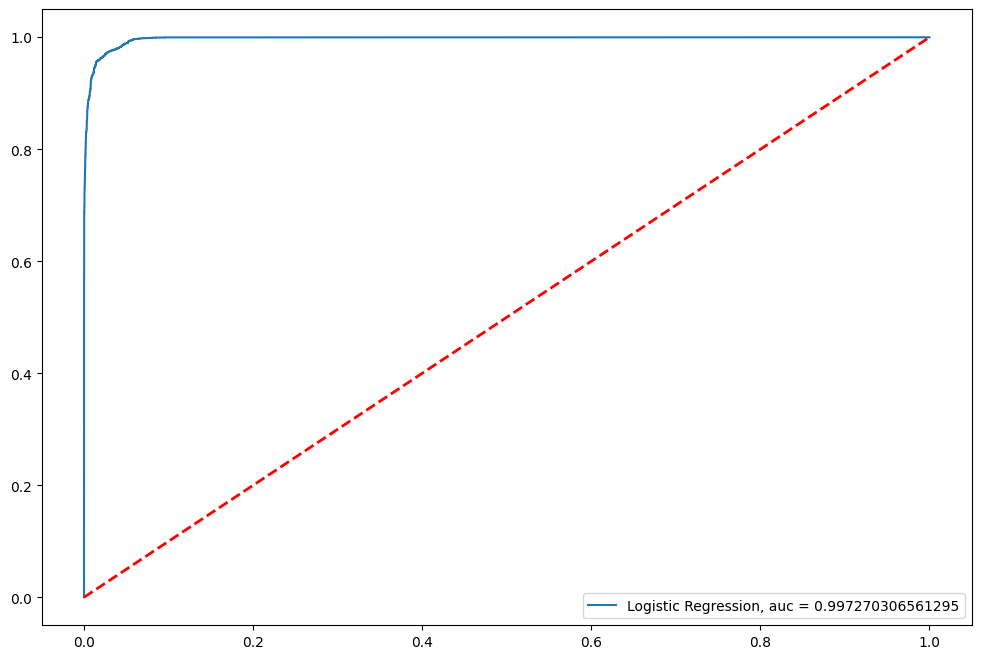

In [59]:
y_pred_prob = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label = 'Logistic Regression, auc = '+str(auc) )
plt.plot([0, 1], [0, 1], color = 'red', lw=2, linestyle = '--')
plt.legend(loc=4)

In [61]:
classifiers = [
    LogisticRegression(max_iter=1000, random_state=SEED),
    DecisionTreeClassifier(max_depth=5, random_state=SEED),
    RandomForestClassifier(max_depth=5, random_state=SEED)
]

LogisticRegression
**Resultados**
Acurácia:  0.9417722516699837
Precisão:  0.9241993556945234
Recall:  0.9623125493291239
F1:  0.9428709521507975
DecisionTreeClassifier
**Resultados**
Acurácia:  0.9622849711324362
Precisão:  0.9381639982043992
Recall:  0.9897000789265983
F1:  0.9632432017206943
RandomForestClassifier
**Resultados**
Acurácia:  0.9723738398786183
Precisão:  0.9705165500432424
Recall:  0.9742699289660616
F1:  0.9723896175509079


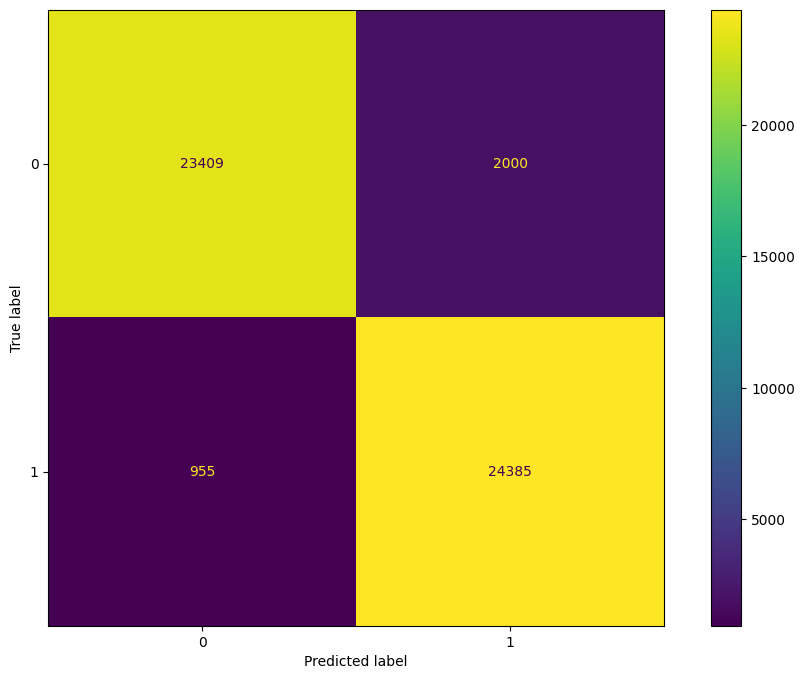

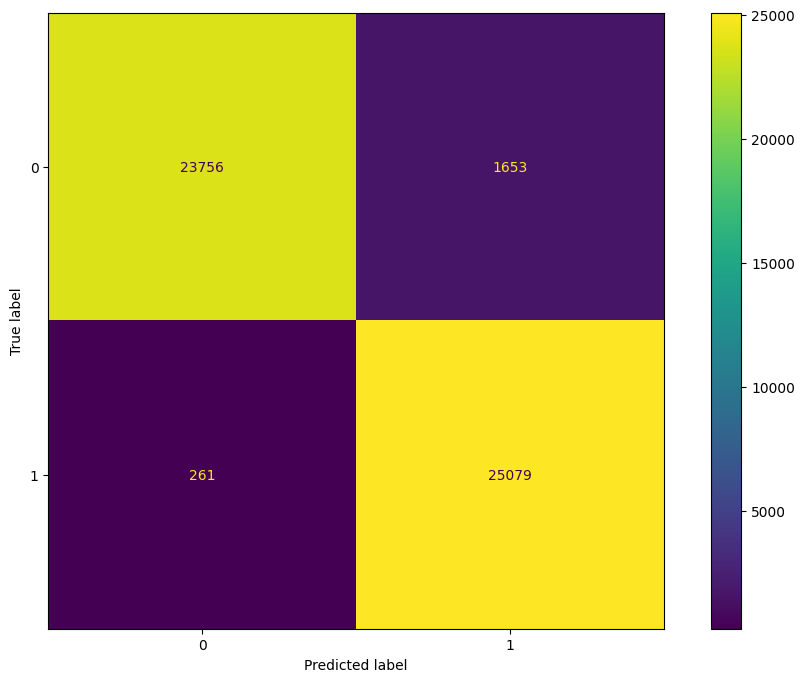

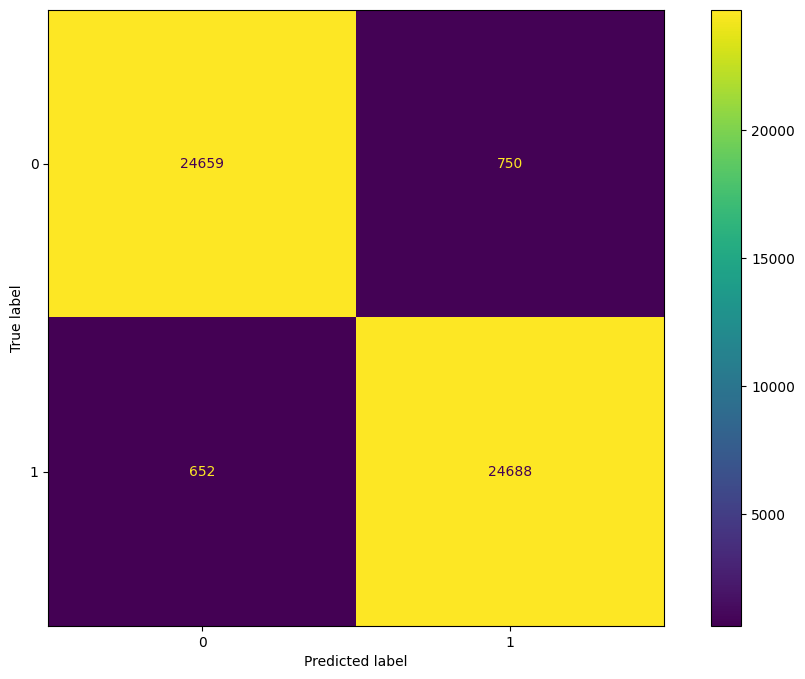

In [63]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print('='*30)
    print(name)
    print('**Resultados**')
    
    y_pred = clf.predict(X_test)
    
    metricas(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)
    disp.plot()
    

In [67]:
n_estimators = np.arange(20, 200, step=20)
criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt', 'log2']
max_depth = list(np.arange(2, 10, step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [68]:
param_grid = {
    'n_estimators': n_estimators,
    'criterion': criterion,
    'max_features': max_features,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap,
}

In [70]:
from sklearn.model_selection import RandomizedSearchCV

In [71]:
SEED = 70

rforest = RandomForestClassifier(random_state = SEED)

In [72]:
random_cv = RandomizedSearchCV(
    rforest, param_grid, n_iter=5, cv=3, scoring='recall', n_jobs=-1, random_state=SEED)

In [74]:
rcv = random_cv.fit(X_train, y_train)

In [75]:
pd.DataFrame(rcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,40.960127,1.437325,1.092939,0.123571,160,8,4,sqrt,gini,True,"{'n_estimators': 160, 'min_samples_split': 8, ...",0.999409,0.999842,0.999488,0.999580,0.000188,5
1,35.627203,1.554691,0.889579,0.033214,100,6,2,sqrt,entropy,False,"{'n_estimators': 100, 'min_samples_split': 6, ...",0.999527,0.999882,0.999567,0.999659,0.000159,4
2,30.389378,1.287906,0.758119,0.078073,80,2,1,sqrt,entropy,False,"{'n_estimators': 80, 'min_samples_split': 2, '...",0.999606,0.999803,0.999606,0.999672,0.000093,3
3,34.988098,1.542686,1.252883,0.148796,120,8,1,log2,gini,False,"{'n_estimators': 120, 'min_samples_split': 8, ...",0.999567,0.999882,0.999606,0.999685,0.000140,2
4,22.254728,0.683462,0.448284,0.020739,100,2,1,sqrt,entropy,True,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.999645,0.999921,0.999645,0.999737,0.000130,1


In [76]:
rcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'criterion': 'entropy',
 'bootstrap': True}

In [78]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state=SEED)

rfn.fit(X_train, y_train)
y_pred = rfn.predict(X_test)

In [79]:
metricas(y_test, y_pred)

Acurácia:  0.9991921023074346
Precisão:  0.9986203634356893
Recall:  0.9997632202052091
F1:  0.9991914650259324


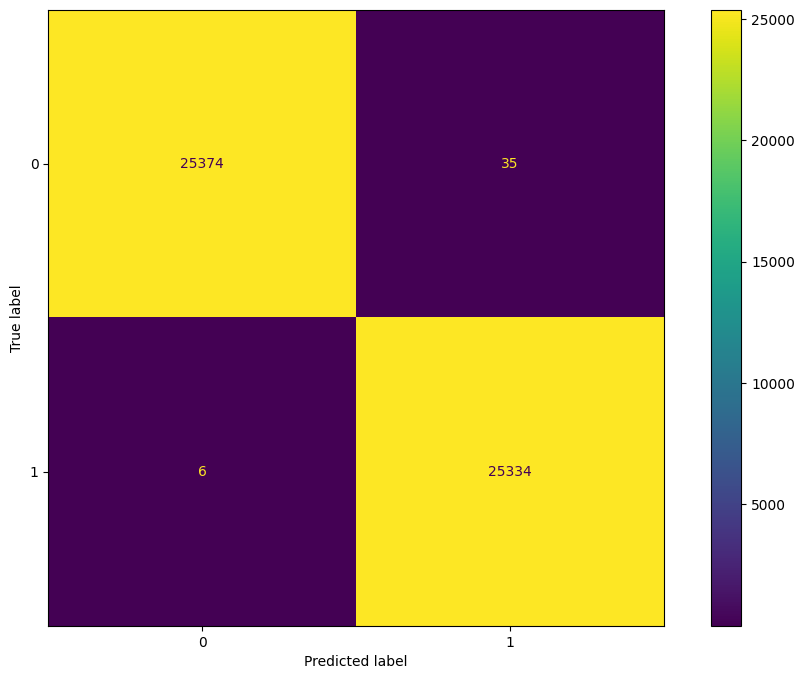

In [80]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

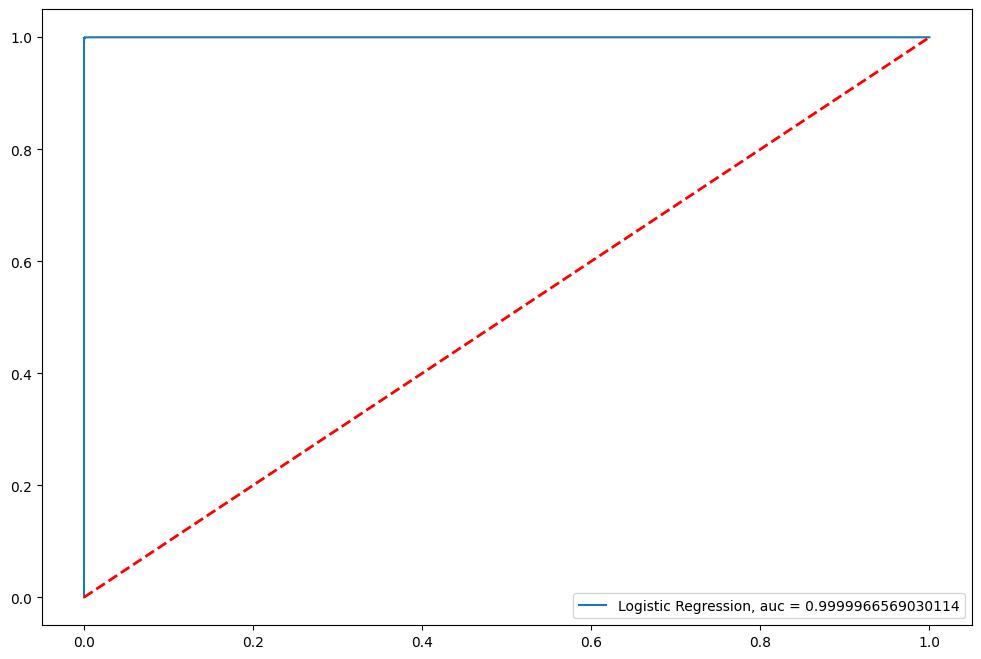

In [82]:
y_pred_prob = rfn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label = 'Logistic Regression, auc = '+str(auc) )
plt.plot([0, 1], [0, 1], color = 'red', lw=2, linestyle = '--')
plt.legend(loc=4)